<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Download models

In [1]:
%%shell

repo_path="https://huggingface.co/kuprel/min-dalle/resolve/main"

mega_path="/content/min-dalle/pretrained/dalle_bart_mega"
vqgan_path="/content/min-dalle/pretrained/vqgan"

git clone https://github.com/kuprel/min-dalle

mkdir -p ${vqgan_path}
mkdir -p ${mega_path}

curl ${repo_path}/detoker.pt -L --output ${vqgan_path}/detoker.pt
curl ${repo_path}/vocab.json -L --output ${mega_path}/vocab.json
curl ${repo_path}/merges.txt -L --output ${mega_path}/merges.txt
curl ${repo_path}/encoder.pt -L --output ${mega_path}/encoder.pt
curl ${repo_path}/decoder.pt -L --output ${mega_path}/decoder.pt

Cloning into 'min-dalle'...
remote: Enumerating objects: 511, done.
remote: Counting objects: 100% (314/314), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 511 (delta 202), reused 239 (delta 149), pack-reused 197
Receiving objects: 100% (511/511), 1.72 MiB | 8.46 MiB/s, done.
Resolving deltas: 100% (298/298), done.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  782k  100  782k    0     0   950k      0 --:--:-- --:--:-- --:--:--  948k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  449k  100  449k    0     0   565k      0 --:--:-- --:--:-- --:--:--  565k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   267  100   267    0 

### Load Model

In [2]:
import os
os.chdir('/content/min-dalle')
from min_dalle.min_dalle_torch import MinDalleTorch

model = MinDalleTorch(is_mega=True, is_reusable=True)

initializing MinDalleTorch
reading files from pretrained/dalle_bart_mega
initializing DalleBartEncoderTorch
initializing DalleBartDecoderTorch
initializing VQGanDetokenizer


### Generate an Image

tokenizing text
['Ġcctv']
['Ġof']
['Ġyoda']
['Ġrob', 'bing']
['Ġa']
['Ġliquor']
['Ġstore']
text tokens [0, 17685, 111, 24509, 976, 11811, 58, 13142, 1110, 2]
encoding text tokens
sampling image tokens
detokenizing image


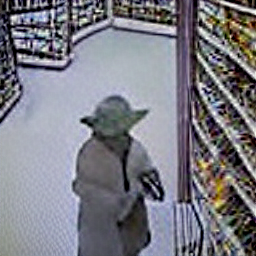

CPU times: user 7.4 s, sys: 31.8 ms, total: 7.43 s
Wall time: 7.39 s


In [4]:
%%time

text = "cctv of yoda robbing a liquor store" #@param {type:"string"}
seed = 0 #@param {type:"integer"}

display(model.generate_image(text, seed))